# Indicators of Future Adoption

Some user logged into a product more frequectly than othes. The more a user logged into the product, the more it is better for business companies. There are many features that can indicate or predicts user with more frequent logged in to the product. The availbel datasets contain many features of all the users. The features includes email domain, creation source, personal projects, guest invite, org invite, signup, creation time, last session creation time, invited by user it etc. Among all of them some might indicate the more frequent user. It is possible that frequent user share same features than others. The aim of this project is to analyze all the dataset and extract the common features of adopted users. It will be done by analyzing the common feature of the frequent user and see if they share something common or not. The more dominent common feature among them will be the indicators of future adoptation. 

## Methodology

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

### Reading the datasets

In [3]:
path = r'D:\Freelancing\Python_Freelancing\Indicator_to_Future_Adoptation'
dfUserIntern = pd.read_csv(path+'\\takehome_users-intern.csv', encoding='latin-1')
dfUserEngagementIntern = pd.read_csv(path+'\\takehome_user_engagement-intern.csv', encoding='latin-1')

In [4]:
print ("The total length of the original dataset is:", len(dfUserEngagementIntern))

The total length of the original dataset is: 207917


### Printing out the dataframe to check how our data looks like

In [5]:
dfUserEngagementIntern

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


### Splitting the date from time and storing that in a new column

In [6]:
df = pd.DataFrame(columns = ['timestamp'])
df['timestamp'] = dfUserEngagementIntern['time_stamp'].apply(lambda x : pd.to_datetime(str(x)))
dfUserEngagementIntern['dates'] = df['timestamp'].dt.date

### Printing out the dataframe to check how our data looks like now

In [7]:
dfUserEngagementIntern

,time_stamp,user_id,visited,dates
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06
207913,2013-01-15 18:28:37,11997,1,2013-01-15
207914,2014-04-27 12:45:16,11998,1,2014-04-27
207915,2012-06-02 11:55:59,11999,1,2012-06-02


### Processing the dataframe to extract the Adopted Users

Since we have defined our **Adopted User** as the one who has logged into the product on three separate days in at least one seven-day period, so we filter out the data and select only those users who have atleast logged in three times to clean our dataset.

In [8]:
dfUserEngagementInternFiltered = dfUserEngagementIntern.groupby('user_id').filter(lambda x: len(x) > 2)

In [9]:
print ("The total length of the filtered dataset is:", len(dfUserEngagementInternFiltered))

The total length of the filtered dataset is: 201002


The following piece of code extracts the Adopted User. It first extracts the data for each unique user id, and then checks if the selected user has logged into the product on three separate days in at least one seven-day period or not. If yes, then it appends the 'adoptedUsers' list.

In [11]:
# Sorting the filtered dataframe based on the user ids
dfUserEngagementInternFilteredSorted = dfUserEngagementInternFiltered.sort_values('user_id')

# Storing the unique user IDs into the userIDs list to have record of each user
userIDs = np.unique(dfUserEngagementInternFilteredSorted['user_id'])
adoptedUsers = []

for userID in userIDs:
    uniqueData = dfUserEngagementInternFilteredSorted[dfUserEngagementInternFilteredSorted['user_id'] == userID]
    uniqueDataSorted = uniqueData.sort_values('dates')
    for i in range(0,len(uniqueDataSorted['dates']),3):
        try:
            d1 = uniqueDataSorted['dates'].values[i]
            d2 = uniqueDataSorted['dates'].values[i+1]
            d3 = uniqueDataSorted['dates'].values[i+2]

            Datediff1 = abs(d2-d1).days
            Datediff2 = abs(d3-d2).days

            if (Datediff1<8 and Datediff2<8):
                #print(d1,d2,d3)
                adoptedUsers.append(uniqueDataSorted['user_id'].values[i])
        except:
            pass
        

Since we have appended Adopted User everytime if user has logged on in seven day period, so it has repeated values as well. So we select only the unique ids to get final output of adopted users.

In [12]:
adoptedUsers = np.unique(adoptedUsers)

In [13]:
print ("The total length of the adopted users is:", len(adoptedUsers))

The total length of the adopted users is: 1662


### Factors predicting the User Adoption

Selecting only the data of users who are adopted users.

In [14]:
adoptedUserIterns = dfUserIntern[dfUserIntern['object_id'].isin(adoptedUsers)]

Printing the dataframe to see how it looks like

In [15]:
adoptedUserIterns

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,uhzdq.com
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,cuvox.de
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,cuvox.de
...,...,...,...,...,...,...,...,...,...,...,...
11966,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,gmail.com
11968,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,hotmail.com
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,gustr.com
11987,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,yahoo.com


We first analyze the Creation Source of the adopted users, that is we analyze how they signed up for their accounts. This will allow us to work on that strategy more to get more adopted users

In [16]:
creationSource = adoptedUserIterns['creation_source'].to_list()

Getting the Creation Source along with their Counts to see what is the major source for account creation

In [17]:
creationSourceCounts = {i:creationSource.count(i) for i in creationSource}

In [18]:
for key, value in creationSourceCounts.items():
    print ("{:<20} :{:<20}".format(key, value))

ORG_INVITE           :577                 
SIGNUP               :300                 
GUEST_INVITE         :375                 
SIGNUP_GOOGLE_AUTH   :239                 
PERSONAL_PROJECTS    :171                 


We see that majority adopted users are those who have been invited to an organization (as a full member). After that we have those who have signup via asana.com

We then analyze the Domain of the adopted users, that is we analyze what Email domain does majority of the adopted users use

In [19]:
domain = adoptedUserIterns['email_domain'].to_list()

Getting the Email Domain along with their Counts to see what is the major email domain which users have used for account creation

In [20]:
domainCounts = {i:domain.count(i) for i in domain}

# Getting the top 5 email domains used for signing up
domainTop5 = sorted(domainCounts, key=domainCounts.get, reverse=True)[:6]

top5WithValues = {domainTop5[0]: domainCounts[domainTop5[0]], domainTop5[1]: domainCounts[domainTop5[1]],
                 domainTop5[2]: domainCounts[domainTop5[2]], domainTop5[3]: domainCounts[domainTop5[3]], 
                 domainTop5[4]: domainCounts[domainTop5[4]], domainTop5[5]: domainCounts[domainTop5[5]], }


In [21]:
for key, value in top5WithValues.items():
    print ("{:<15} :{:<20}".format(key, value))

gmail.com       :557                 
yahoo.com       :268                 
hotmail.com     :206                 
jourrapide.com  :168                 
gustr.com       :154                 
cuvox.de        :144                 


We see that majority adopted users are the ones using the gmail.com domain.

### Visualizing the extracted details

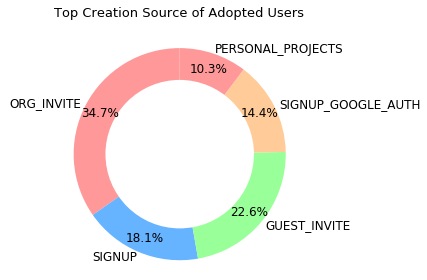

In [25]:
labels = list(creationSourceCounts.keys())
values = list(creationSourceCounts.values())

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize':12}, pctdistance = 0.85, labeldistance = 1.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top Creation Source of Adopted Users\n',fontsize=13)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

This figure shows the indicator of adoptive users. It illustrates that percentages of different features of adopted user. It can seen from the figure that most of the adopted user use the ORG_INVITE (invited to an organizatoin) as their creation source. This is the most dominent indicator having percentage 34.7% among all others. The second most dominent feature of adopted users is GUEST_INVITE.   

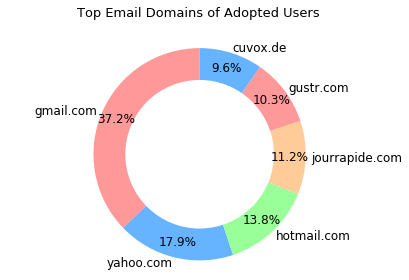

In [27]:
labels = list(top5WithValues.keys())
values = list(top5WithValues.values())

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize':12}, pctdistance = 0.85, labeldistance = 1.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top Email Domains of Adopted Users\n',fontsize=13)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

This figure depicts another most important features of the adopted users which is email domains. Adopted user used many domains like cuvox.de, gustr.com, hotmail.com, gmail.com, jourrapide.com, and yahoo.com. Among all, gmail.com is most frequent domain that has been used by adopted user. It contribution is 37.2% which is higher than all others. 

## Conclusion

The whole dicussion was about to find some indicators for the future adoption. The available datasets have been analyzed carefully and it is concluded that among all other email domains, gmail.com is most frequentely used by adopted users. It contribute above 37% among all others available domains. The second feature is creation source of adopted users. Here ORG_INVITE (organization invite) is the most common feature of adopted users and it contributes about 34% among all others. 